In [1]:
# %pip install xgboost
# %pip install mlforecast

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
Dataset_WF_site1 = pd.read_excel(r'Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site3 = pd.read_excel(r'Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)

In [149]:
Dataset_WF_site1.tail()

,Time(year-month-day h:m:s),Wind speed at height of 10 meters (m/s),Wind direction at height of 10 meters (˚),Wind speed at height of 30 meters (m/s),Wind direction at height of 30 meters (˚),Wind speed at height of 50 meters (m/s),Wind direction at height of 50 meters (˚),Wind speed - at the height of wheel hub (m/s),Wind speed - at the height of wheel hub (˚),Air temperature (°C),Atmosphere (hpa),Relative humidity (%),Power (MW)
70171,2020-12-31 22:45:00,5.738,234.600,6.408,235.454,6.575,242.033,6.680,238.433,-9.108,890.008,53.312,13.633642
70172,2020-12-31 23:00:00,5.748,229.333,6.231,233.423,6.372,239.800,6.448,236.833,-9.978,889.817,53.877,6.869759
70173,2020-12-31 23:15:00,4.468,235.133,4.406,253.261,4.381,263.400,4.399,261.733,-9.808,889.825,54.437,4.352931
70174,2020-12-31 23:30:00,3.730,242.580,3.280,252.492,3.204,268.600,3.446,266.733,-9.633,889.492,54.677,7.185250
70175,2020-12-31 23:45:00,3.291,243.733,3.311,254.267,3.643,266.733,4.306,268.633,-8.991,889.492,53.381,12.384466


In [132]:
Dataset_WF_site2.rename(columns={'Wind speed - at the height of wheel hub  (m/s)': 'Wind speed - at the height of wheel hub (m/s)'}, inplace=True)

In [133]:
Features = ['Wind speed at height of 10 meters (m/s)', 'Wind speed at height of 30 meters (m/s)', 'Wind speed at height of 50 meters (m/s)', 'Wind speed - at the height of wheel hub (m/s)']
Target = ['Power (MW)']

In [134]:
# df2 = Dataset_WF_site1.drop(columns=['Wind direction at height of 10 meters (˚)','Wind direction at height of 30 meters (˚)','Wind direction at height of 50 meters (˚)','Atmosphere (hpa)','Relative humidity (%)','Air temperature  (°C) ', 'Wind speed - at the height of wheel hub (˚)'],axis=1)
df2 = Dataset_WF_site2[Features + Target].copy()
df2 = df2.set_index(Dataset_WF_site2['Time(year-month-day h:m:s)'])
df2.index = pd.to_datetime(df2.index)

In [103]:
df2

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s),Power (MW)
Time(year-month-day h:m:s),,,,,
2019-01-01 00:15:00,2.32218,2.59042,1.62735,2.34887,-0.376874
2019-01-01 00:30:00,2.32218,2.59042,1.62735,2.34887,-0.387959
2019-01-01 00:45:00,2.32218,2.59042,1.62735,2.34887,-0.395348
2019-01-01 01:00:00,2.32218,2.59042,1.62735,2.34887,-0.384264
2019-01-01 01:15:00,2.32218,2.59042,1.62735,2.34887,-0.406433
...,...,...,...,...,...
2020-12-31 22:45:00,8.62000,9.04000,9.67280,9.61000,57.983200
2020-12-31 23:00:00,8.88000,8.99000,9.61930,8.93000,58.700000
2020-12-31 23:15:00,9.77000,9.78000,10.46460,9.69000,63.178200


In [104]:
num_rows_with_zero = (df2 == 0).any(axis=1).sum()
print(f'Number of rows with zero values: {num_rows_with_zero}')

Number of rows with zero values: 21889


In [105]:
def interpolate_zeros(df):
    df_zero_rows = (df == 0).any(axis=1)
    df.loc[df_zero_rows] = df.loc[df_zero_rows].replace(0, np.nan).interpolate()
    return df

In [106]:
df2 = interpolate_zeros(df2)

In [107]:
df2

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s),Power (MW)
Time(year-month-day h:m:s),,,,,
2019-01-01 00:15:00,2.32218,2.59042,1.62735,2.34887,-0.376874
2019-01-01 00:30:00,2.32218,2.59042,1.62735,2.34887,-0.387959
2019-01-01 00:45:00,2.32218,2.59042,1.62735,2.34887,-0.395348
2019-01-01 01:00:00,2.32218,2.59042,1.62735,2.34887,-0.384264
2019-01-01 01:15:00,2.32218,2.59042,1.62735,2.34887,-0.406433
...,...,...,...,...,...
2020-12-31 22:45:00,8.62000,9.04000,9.67280,9.61000,57.983200
2020-12-31 23:00:00,8.88000,8.99000,9.61930,8.93000,58.700000
2020-12-31 23:15:00,9.77000,9.78000,10.46460,9.69000,63.178200


In [108]:
df2.index

DatetimeIndex(['2019-01-01 00:15:00', '2019-01-01 00:30:00',
               '2019-01-01 00:45:00', '2019-01-01 01:00:00',
               '2019-01-01 01:15:00', '2019-01-01 01:30:00',
               '2019-01-01 01:45:00', '2019-01-01 02:00:00',
               '2019-01-01 02:15:00', '2019-01-01 02:30:00',
               ...
               '2020-12-31 21:30:00', '2020-12-31 21:45:00',
               '2020-12-31 22:00:00', '2020-12-31 22:15:00',
               '2020-12-31 22:30:00', '2020-12-31 22:45:00',
               '2020-12-31 23:00:00', '2020-12-31 23:15:00',
               '2020-12-31 23:30:00', '2020-12-31 23:45:00'],
              dtype='datetime64[ns]', name='Time(year-month-day h:m:s)', length=70175, freq=None)

In [109]:
num_rows_with_zero = (df2 == 0).any(axis=1).sum()
print(f'Number of rows with zero values: {num_rows_with_zero}')

Number of rows with zero values: 0


In [110]:
train_size = int(len(df2) * 0.8)
train, test = df2.iloc[:train_size], df2.iloc[train_size:]

In [111]:
# df2.set_index('Time(year-month-day h:m:s)')

In [112]:
# df2.dtypes

In [113]:
y_train = train[Target]
X_train = train[Features]

In [114]:
# X_train = train.drop(columns =('Time(year-month-day h:m:s)'))
# X_train = X_train.drop(columns =('Time(year-month-day h:m:s)'))


In [115]:
y_train

,Power (MW)
Time(year-month-day h:m:s),
2019-01-01 00:15:00,-0.376874
2019-01-01 00:30:00,-0.387959
2019-01-01 00:45:00,-0.395348
2019-01-01 01:00:00,-0.384264
2019-01-01 01:15:00,-0.406433
...,...
2020-08-07 18:00:00,26.621400
2020-08-07 18:15:00,24.918000
2020-08-07 18:30:00,22.693700


In [116]:
X_train

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s)
Time(year-month-day h:m:s),,,,
2019-01-01 00:15:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 00:30:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 00:45:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 01:00:00,2.32218,2.59042,1.62735,2.34887
2019-01-01 01:15:00,2.32218,2.59042,1.62735,2.34887
...,...,...,...,...
2020-08-07 18:00:00,5.57900,6.24800,6.81300,7.22400
2020-08-07 18:15:00,5.51300,5.58100,6.13400,6.23100
2020-08-07 18:30:00,5.12500,5.44300,6.01700,6.45800


In [117]:
X_test = test[Features]
y_test = test[Target]

In [118]:
X_test

,Wind speed at height of 10 meters (m/s),Wind speed at height of 30 meters (m/s),Wind speed at height of 50 meters (m/s),Wind speed - at the height of wheel hub (m/s)
Time(year-month-day h:m:s),,,,
2020-08-07 19:15:00,6.963,7.125,7.2710,7.624
2020-08-07 19:30:00,6.156,6.621,5.7930,5.844
2020-08-07 19:45:00,5.778,6.059,6.5770,6.970
2020-08-07 20:00:00,4.984,5.238,6.3020,6.700
2020-08-07 20:15:00,4.554,5.238,5.4600,5.730
...,...,...,...,...
2020-12-31 22:45:00,8.620,9.040,9.6728,9.610
2020-12-31 23:00:00,8.880,8.990,9.6193,8.930
2020-12-31 23:15:00,9.770,9.780,10.4646,9.690


In [119]:
y_test

,Power (MW)
Time(year-month-day h:m:s),
2020-08-07 19:15:00,18.8511
2020-08-07 19:30:00,19.1245
2020-08-07 19:45:00,19.2612
2020-08-07 20:00:00,22.3464
2020-08-07 20:15:00,15.0417
...,...
2020-12-31 22:45:00,57.9832
2020-12-31 23:00:00,58.7000
2020-12-31 23:15:00,63.1782


In [120]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
       verbose=100)

[0]	validation_0-rmse:17.94575	validation_1-rmse:14.95658


[60]	validation_0-rmse:9.36163	validation_1-rmse:8.31782


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

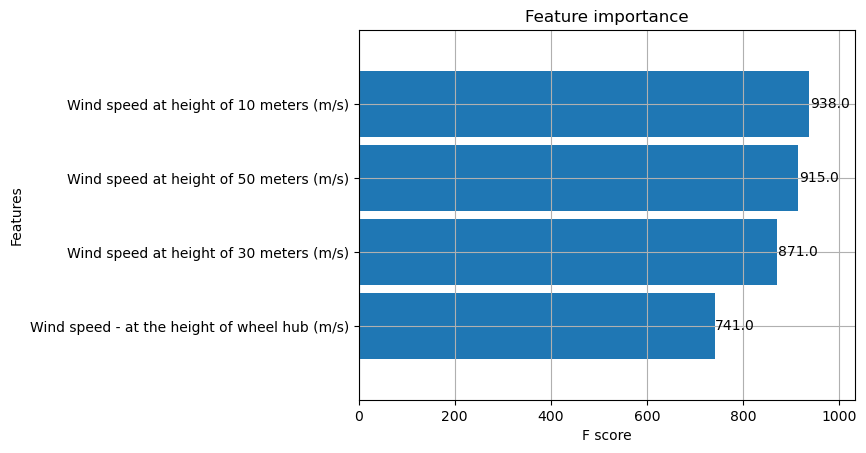

In [121]:
_ = plot_importance(reg, height=0.9)

 Forecast on the test set

In [122]:
test['Pred'] = reg.predict(X_test)

/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_62914/3881726720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = reg.predict(X_test)


In [123]:
# test = test.merge(test[['prediction']], how='left', left_index=True, right_index=True)

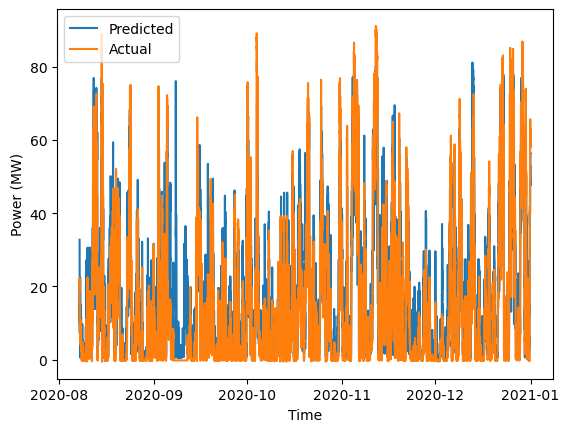

In [124]:
plt.plot(test['Pred'], label='Predicted')
# plt.plot(test['Power (MW)'], label='Actual')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Power (MW)')
plt.legend()
plt.show()

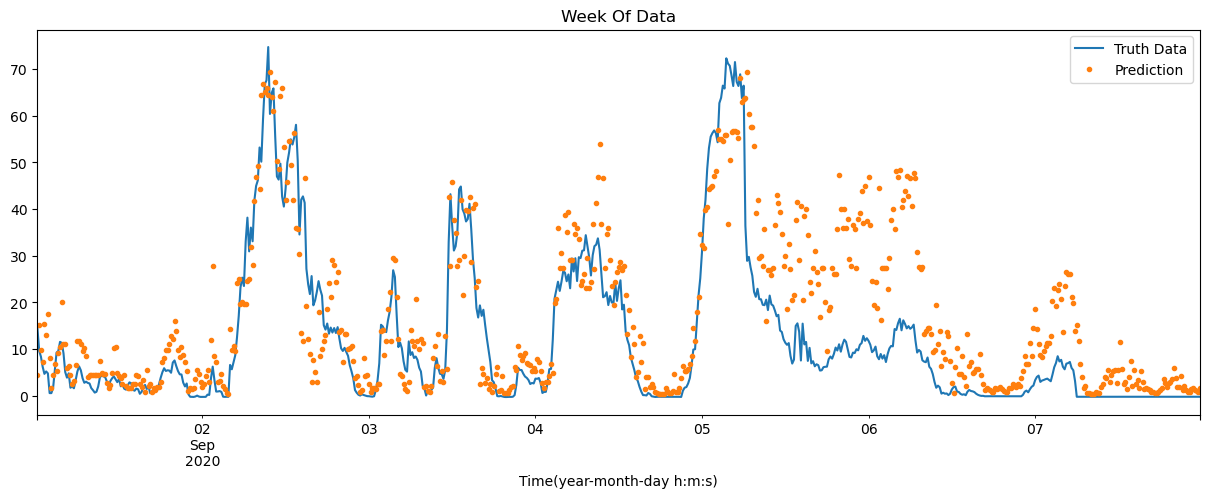

In [125]:
ax = test.loc[(test.index > '09-01-2020') & (test.index < '09-08-2020')]['Power (MW)'].plot(figsize=(15, 5), title='Week Of Data')
test.loc[(test.index > '09-01-2020') & (test.index < '09-08-2020')]['Pred'].plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [138]:
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_absolute_percentage_error, mean_absolute_scaled_error, MeanSquaredError, mean_relative_absolute_error, geometric_mean_absolute_error
def calc_err_metrics(pred, train=None, test=None):
    print("MAPE: ", mean_absolute_percentage_error(test, pred))
    print("MAE: ", mean_absolute_error(test, pred))
    print("MASE: ", mean_absolute_scaled_error(test, pred, y_train=train))
    print("MSE: ", mean_squared_error(test,pred))
    rmse = MeanSquaredError(square_root=True)
    print("RMSE: ", rmse(test, pred))

In [144]:
calc_err_metrics(test=test['Power (MW)'].to_frame(), pred=test['Pred'].to_frame(), train=train['Power (MW)'].to_frame())

MAPE:  156675.38378776205
MAE:  5.403298781996689
MASE:  2.5181346614571205
MSE:  68.44866697215828
RMSE:  8.273370955792945


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [35]:
def calculate_smape(actual, predicted) -> float: 
  
    # Convert actual and predicted to numpy 
    # array data type if not already 
    if not all([isinstance(actual, np.ndarray),  
                isinstance(predicted, np.ndarray)]): 
        actual, predicted = np.array(actual), np.array(predicted) 
  
    return round( 
        np.mean( 
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2) 
        )*100, 2
    ) 

In [93]:
print(calculate_smape(test['Power (MW)'], test['Pred']),'%')

48.35 %


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_absolute_percentage_error, mean_absolute_scaled_error, MeanSquaredError, mean_relative_absolute_error, geometric_mean_absolute_error

#Reading Datasets
Dataset_WF_site1 = pd.read_excel(r'Wind farm site 1 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2 = pd.read_excel(r'Wind farm site 2 (Nominal capacity-200MW).xlsx'
                                ).drop(index=0)
Dataset_WF_site2.rename(columns={'Wind speed - at the height of wheel hub  (m/s)': 'Wind speed - at the height of wheel hub (m/s)'}, inplace=True)
Dataset_WF_site3 = pd.read_excel(r'Wind farm site 3 (Nominal capacity-99MW).xlsx'
                                ).drop(index=0)


In [7]:
def interpolate_zeros(df):
    df_zero_rows = (df == 0).any(axis=1)
    df.loc[df_zero_rows] = df.loc[df_zero_rows].replace(0, np.nan).interpolate()
    return df

def calc_err_metrics(pred, train=None, test=None):
    print("MAPE: ", mean_absolute_percentage_error(test, pred))
    print("MAE: ", mean_absolute_error(test, pred))
    print("MASE: ", mean_absolute_scaled_error(test, pred, y_train=train))
    print("MSE: ", mean_squared_error(test,pred))
    rmse = MeanSquaredError(square_root=True)
    print("RMSE: ", rmse(test, pred))

def plot_data(test):
    plt.plot(test['Pred'], label='Predicted')
    # plt.plot(test['Power (MW)'], label='Actual')
    plt.plot(test['Power (MW)'], label='Actual')
    plt.xlabel('Time')
    plt.ylabel('Power (MW)')
    plt.legend()
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 23:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='24 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 23:45:00')]['Pred'].plot(style='.')
    plt.legend(['Truth Data','Prediction'])
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 11:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='12 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 11:45:00')]['Pred'].plot()
    plt.legend(['Truth Data','Prediction'])
    plt.show()

    ax = test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 05:45:00')]['Power (MW)'].plot(figsize=(15, 5), title='6 Hours Of Data')
    test.loc[(test.index > '09-01-2020 23:45:00') & (test.index < '09-02-2020 05:45:00')]['Pred'].plot()
    plt.legend(['Truth Data','Prediction'])
    plt.show()

def compute_forecast(df) -> pd.DataFrame:
    #Preprocessing data
    Features = ['Wind speed at height of 10 meters (m/s)', 'Wind speed at height of 30 meters (m/s)', 'Wind speed at height of 50 meters (m/s)', 'Wind speed - at the height of wheel hub (m/s)']
    Target = ['Power (MW)']

    df2 = df[Features + Target].copy()
    df2 = df2.set_index(df['Time(year-month-day h:m:s)'])
    df2.index = pd.to_datetime(df2.index)

    #Interpolate zero values
    df2 = interpolate_zeros(df2)
    
    #Compute train and test sets
    train_size = int(len(df2) * 0.75)
    train, test = df2.iloc[:train_size], df2.iloc[train_size:]
    X_train = train[Features]
    y_train = train[Target]
    X_test = test[Features]
    y_test = test[Target]

    #Create XGBoost model
    reg = xgb.XGBRegressor(base_score=0.5,
                       booster='gbtree',    
                       n_estimators=1000,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
   
    #Fit model on training set
    reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

    #Plot feature importance
    # _ = plot_importance(reg, height=0.9)

    #Perform prediction on test set to check accuracy of model
    test['Pred'] = reg.predict(X_test)

    #Plotting the results
    plot_data(test)

    #Calculate error metrics
    calc_err_metrics(test=test['Power (MW)'].to_frame(), pred=test['Pred'].to_frame(), train=train['Power (MW)'].to_frame())

[0]	validation_0-rmse:32.24018	validation_1-rmse:35.13162


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:02:30] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:14.64253	validation_1-rmse:17.40518
[200]	validation_0-rmse:10.09117	validation_1-rmse:12.77841
[300]	validation_0-rmse:9.24497	validation_1-rmse:11.78601
[400]	validation_0-rmse:9.09840	validation_1-rmse:11.55807
[500]	validation_0-rmse:9.04499	validation_1-rmse:11.47797
[600]	validation_0-rmse:9.00710	validation_1-rmse:11.45432
[700]	validation_0-rmse:8.98038	validation_1-rmse:11.44138
[800]	validation_0-rmse:8.96125	validation_1-rmse:11.43394
[900]	validation_0-rmse:8.94722	validation_1-rmse:11.42809
[999]	validation_0-rmse:8.93754	validation_1-rmse:11.42340


/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69576/3293447141.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = reg.predict(X_test)


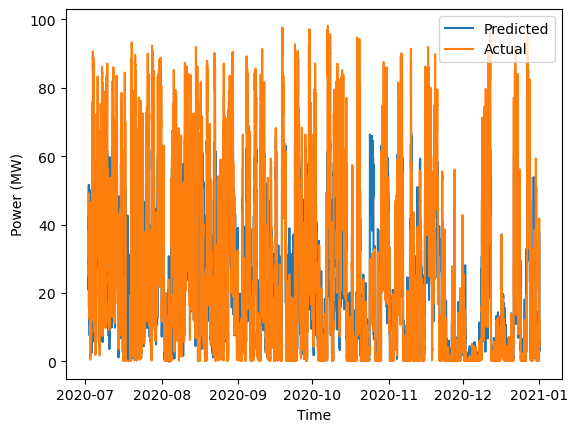

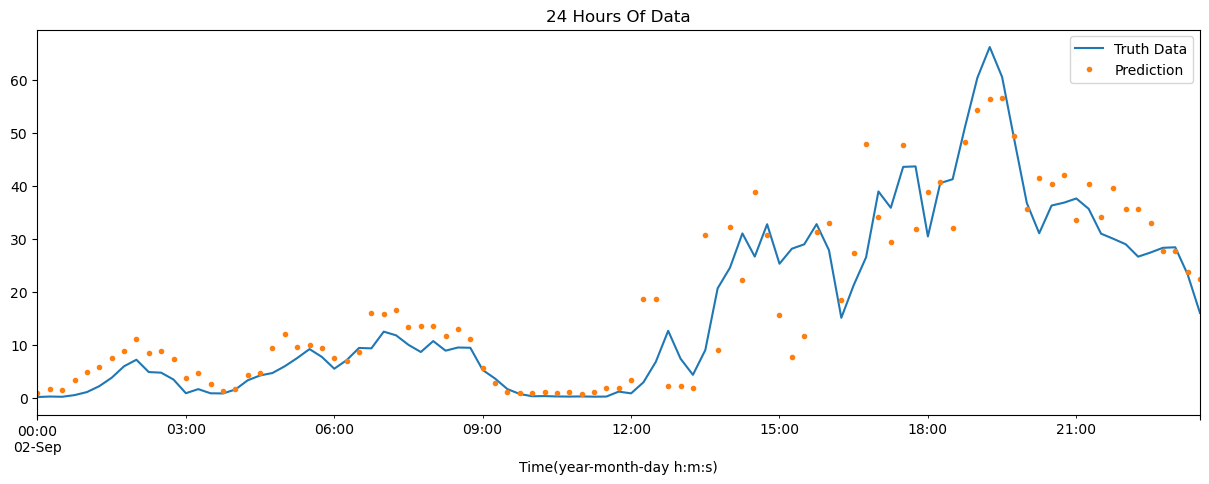

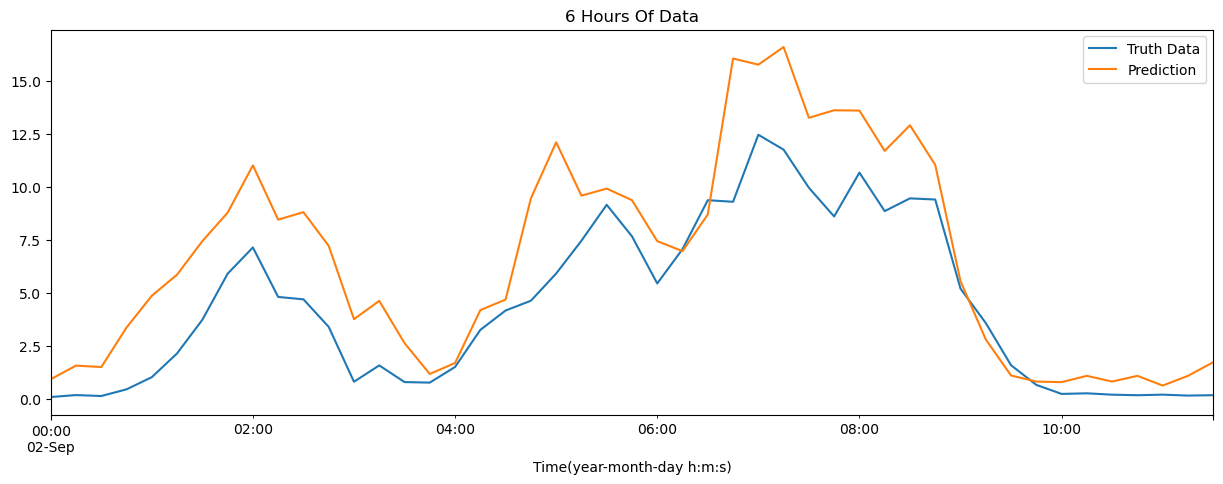

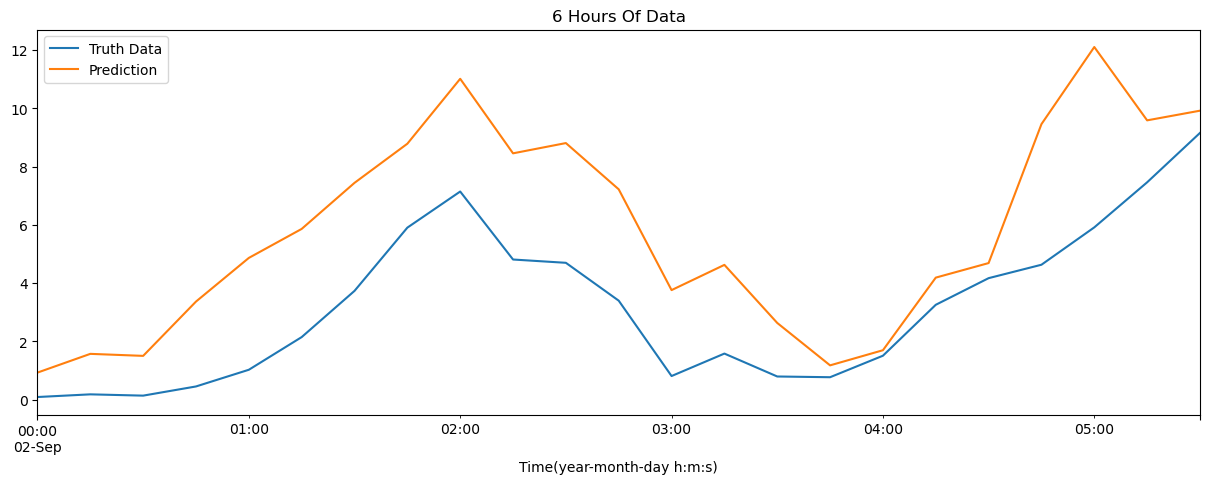

MAPE:  3.2297880957154783
MAE:  6.82432578309071
MASE:  2.644008208382517
MSE:  130.4939673387839
RMSE:  11.42339561333599


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [6]:
compute_forecast(Dataset_WF_site1)

[0]	validation_0-rmse:90.35417	validation_1-rmse:91.26385
[100]	validation_0-rmse:43.72794	validation_1-rmse:42.36860


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:04:01] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:32.55165	validation_1-rmse:29.45899
[300]	validation_0-rmse:30.64378	validation_1-rmse:26.93777
[400]	validation_0-rmse:30.31465	validation_1-rmse:26.42780
[500]	validation_0-rmse:30.16037	validation_1-rmse:26.24411
[600]	validation_0-rmse:30.06504	validation_1-rmse:26.17195
[700]	validation_0-rmse:29.98244	validation_1-rmse:26.12927
[800]	validation_0-rmse:29.90463	validation_1-rmse:26.09381
[900]	validation_0-rmse:29.83985	validation_1-rmse:26.07082
[999]	validation_0-rmse:29.78332	validation_1-rmse:26.05076


/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69576/3685742530.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = reg.predict(X_test)


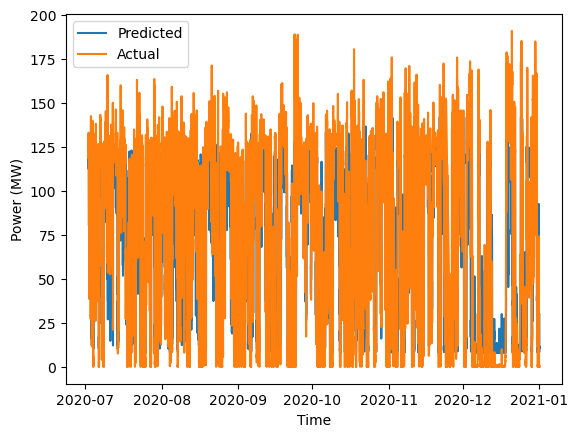

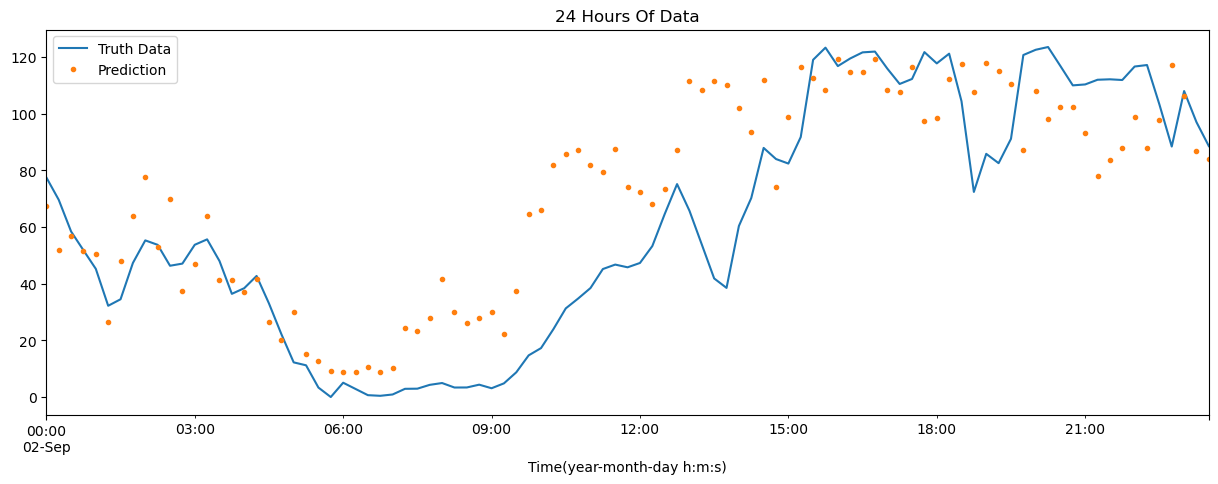

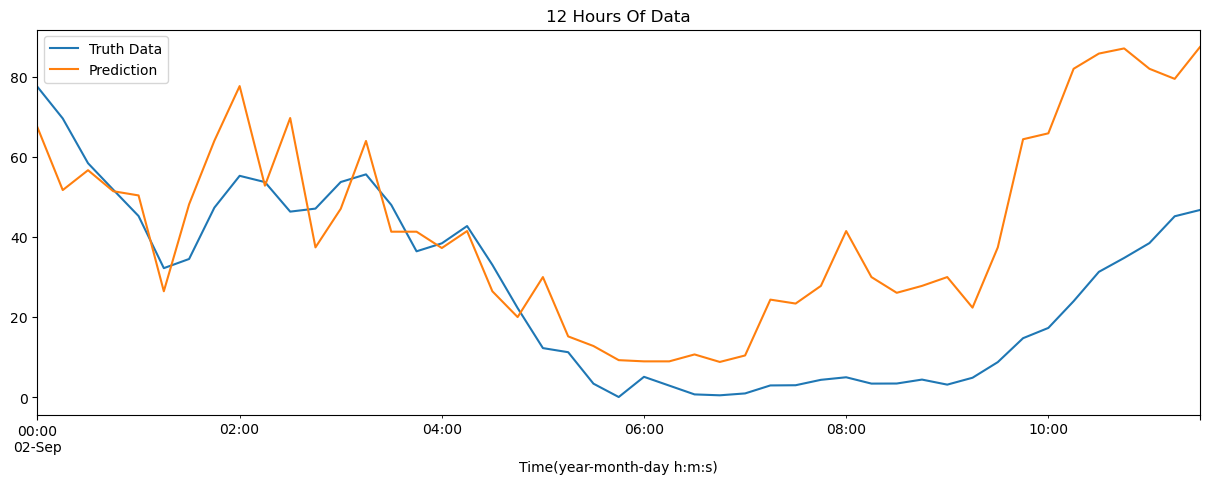

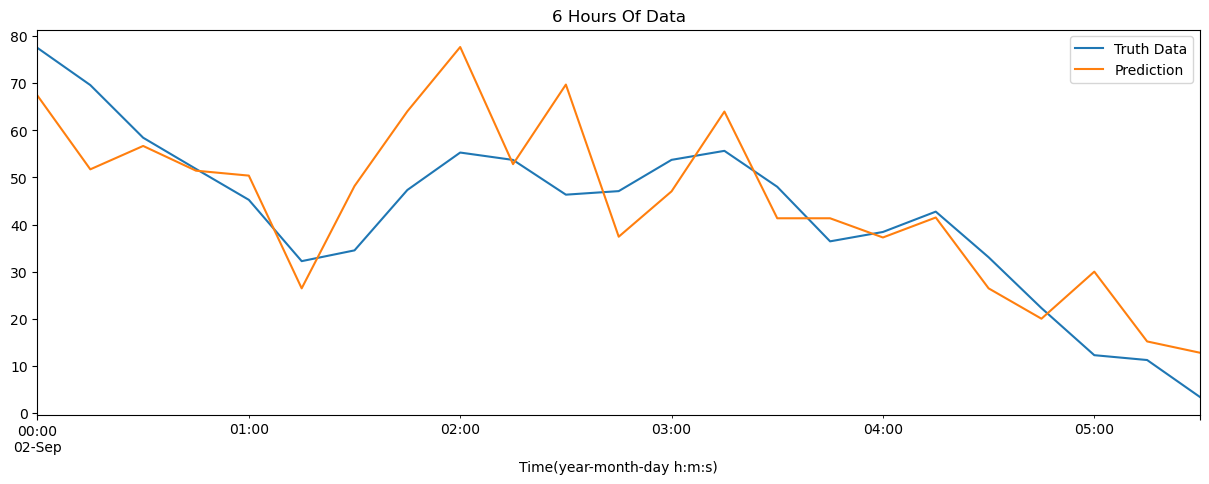

MAPE:  14.833086256797323
MAE:  17.53030486069277
MASE:  3.538911067015181
MSE:  678.6420599887374
RMSE:  26.050759297739045


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [8]:
compute_forecast(Dataset_WF_site2)

[0]	validation_0-rmse:30.17900	validation_1-rmse:22.53449
[100]	validation_0-rmse:15.04887	validation_1-rmse:10.47044


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [10:04:14] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[200]	validation_0-rmse:11.37196	validation_1-rmse:8.11670
[300]	validation_0-rmse:10.71017	validation_1-rmse:8.08947
[400]	validation_0-rmse:10.57228	validation_1-rmse:8.18841
[500]	validation_0-rmse:10.52817	validation_1-rmse:8.24442
[600]	validation_0-rmse:10.50307	validation_1-rmse:8.26750
[700]	validation_0-rmse:10.48636	validation_1-rmse:8.28534
[800]	validation_0-rmse:10.46580	validation_1-rmse:8.26332
[900]	validation_0-rmse:10.44946	validation_1-rmse:8.24423
[999]	validation_0-rmse:10.43881	validation_1-rmse:8.23707


/var/folders/tl/_v6g46bs3cx9m65hytfp0q1w0000gp/T/ipykernel_69576/3685742530.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = reg.predict(X_test)


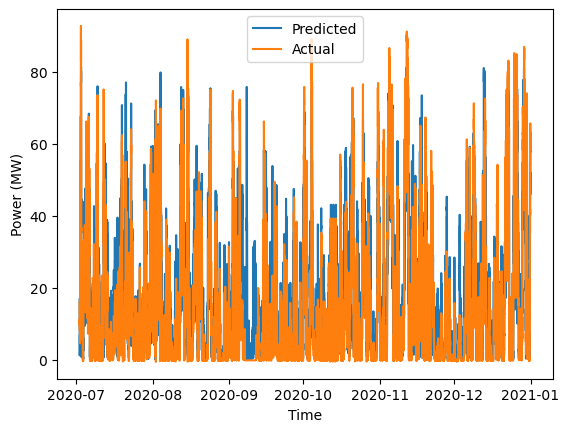

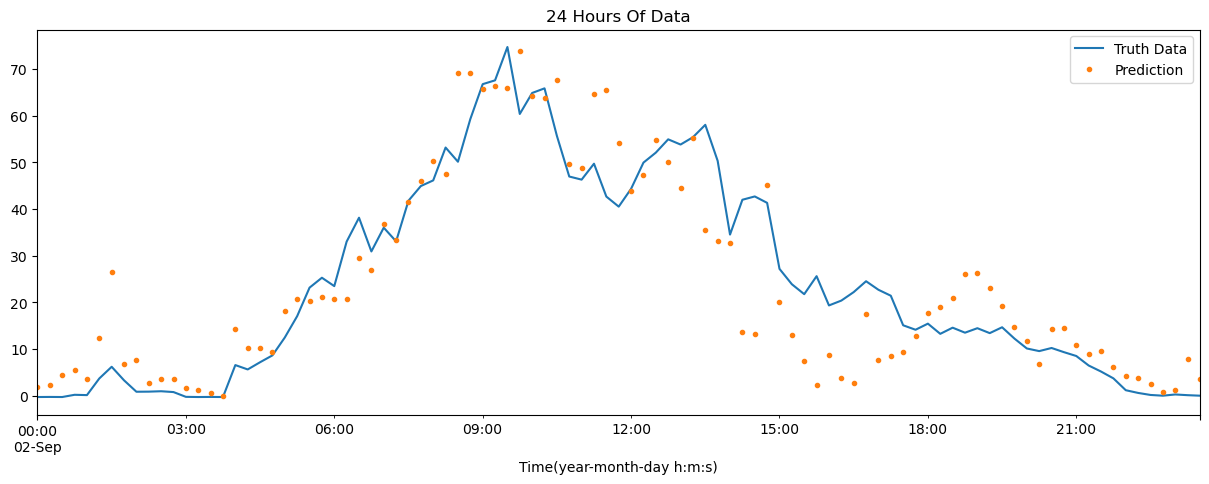

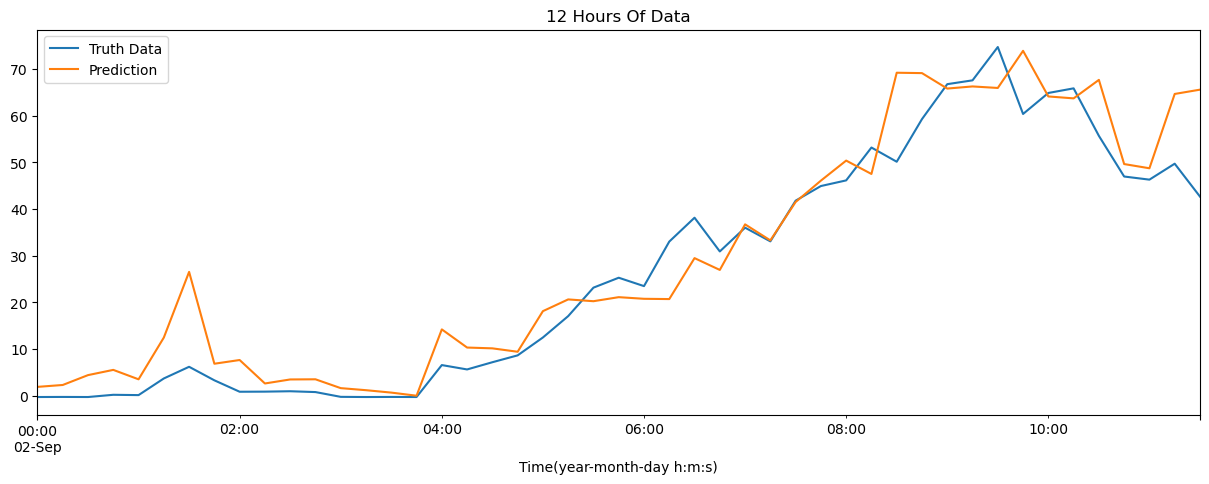

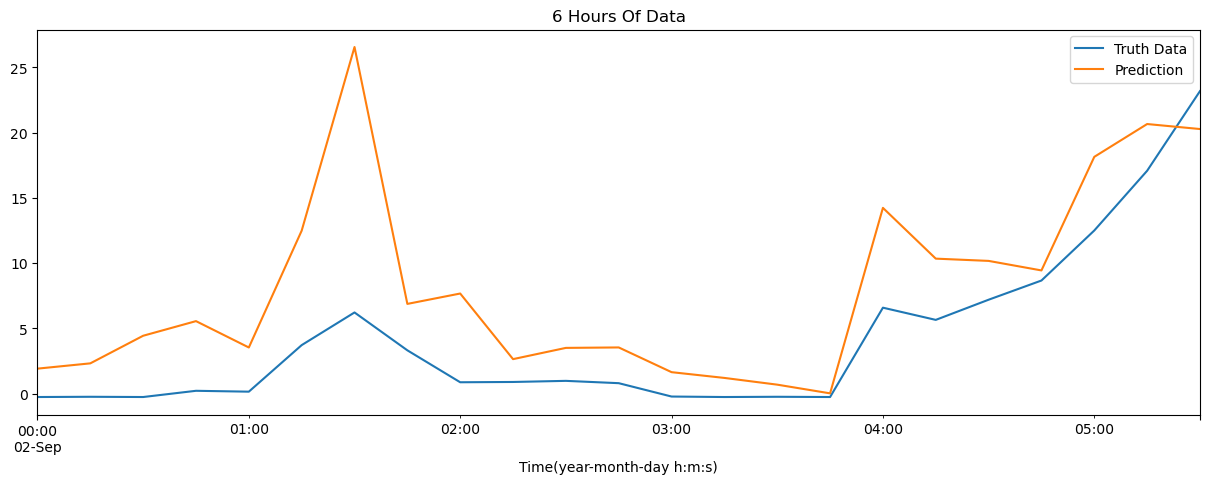

MAPE:  126779.1156467946
MAE:  5.413824776624389
MASE:  2.54897122424832
MSE:  67.84935813527736
RMSE:  8.23707218223061


/Users/Gautam/anaconda3arm/anaconda3/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [9]:
compute_forecast(Dataset_WF_site3)

In [ ]:
future_6 = pd.date_range('2020-12-31 23:45:00','2021-01-01 05:45:00', freq='15min')
future_12 = pd.date_range('2020-12-31 23:45:00','2021-01-01 11:45:00', freq='15min')
future_24 = pd.date_range('2020-12-31 23:45:00','2021-01-01 23:45:00', freq='15min')